<a href="https://colab.research.google.com/github/mavilacamilla/WBDS_LA_final_project/blob/main/camilla_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação dos Pacotes Necessários 


## <font color=red>**2023 Projeto Final Submetido ao WBDS LA Camp** 

### <font color=lightblue> Aluna: Camilla de Ávila

In [1]:
pip install pyrodigal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 27.0 MB/s eta 0:00:00


In [2]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install credentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install pycirclize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.6 MB/s eta 0:00:00


In [6]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importação dos Pacotes Necessários

In [9]:
import credentials
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pyrodigal
import requests
import seaborn as sns
import subprocess
import sys
from Bio import SeqIO
from Bio import Entrez
from io                 import StringIO
from matplotlib.patches import Patch
from pycirclize         import Circos
from pycirclize.parser  import Gff
from requests.adapters  import HTTPAdapter, Retry

# **1. Obtendo uma sequência genômica**

In [11]:
accession = "CP097560.1"
genome = Entrez.efetch(db="nucleotide",
                       id=accession,
                       format="gb",
                       rettype="text")
record = SeqIO.read(genome, "genbank")
genome_length = len(record.seq)

# **2. Predição de genes usando pyrodigal**

 Encontrando os genes codificadores de proteínas em nosso genoma procariótico

In [12]:
orf_finder = pyrodigal.OrfFinder()
orf_finder.train(bytes(record.seq))
orf_genes  = orf_finder.find_genes(bytes(record.seq))


Pseudomonas aeruginosa
Pseudomonas aeruginosa C4.2  

Prefixo = Abbreviation: Pa, Pseudomonas aeruginosa.

In [13]:
aa_file = accession + ".faa"
prefix  = "PaC4"
with open(aa_file, "w") as orf_gene:
    orf_genes.write_translations(orf_gene,sequence_id=prefix)

In [14]:
aa_file


'CP097560.1.faa'

In [16]:
! head CP097560.1.faa

>PaC4_1 # 1 # 1578 # 1 # ID=1_1;partial=10;start_type=Edge;rbs_motif=None;rbs_spacer=None;gc_cont=0.624
LCRLSNLWGISVSVELWQQCVDLLRDELPSQQFNTWIRPLQVEAEGDELRVYAPNRFVLD
WVNEKYLGRLLELLGERGEGQLPALSLLIGSKRSRTPRAAIVPSQTHVAPPPPVAPPPAP
VQPVSAAPVVVPREELPPVTTAPSVSSDPYEPEEPSIDPLAAAMPAGAAPAVRTERNVQV
EGALKHTSYLNRTFTFENFVEGKSNQLARAAAWQVADNLKHGYNPLFLYGGVGLGKTHLM
HAVGNHLLKKNPNAKVVYLHSERFVADMVKALQLNAINEFKRFYRSVDALLIDDIQFFAR
KERSQEEFFHTFNALLEGGQQVILTSDRYPKEIEGLEERLKSRFGWGLTVAVEPPELETR
VAILMKKAEQAKIELPHDAAFFIAQRIRSNVRELEGALKRVIAHSHFMGRPITIELIRES
LKDLLALQDKLVSIDNIQRTVAEYYKIKISDLLSKRRSRSVARPRQVAMALSKELTNHSL
PEIGVAFGGRDHTTVLHACRKIAQLRESDADIREDYKNLLRTLTT*


In [17]:
gff_file = accession + ".gff"
prefix  = "PaC4"
with open(gff_file, "w") as orf_gene:
    orf_genes.write_gff(orf_gene,sequence_id=prefix)

# **3. Obtendo um conjunto de sequências de referência**

In [18]:
uniprot_api_url  = "https://rest.uniprot.org/uniprotkb/stream"
uniprot_api_args = {"compressed" : "false",
                    "format"     : "fasta",
                    "query"      : "(insecticides biosynthesis) AND (reviewed:true)"}
uniprot_ref_seqs = requests.get(uniprot_api_url,params=uniprot_api_args).text

In [19]:
uniprot_seqs_file = open("uniprot_sequences.fasta", "wt")
uniprot_seqs_file.write(uniprot_ref_seqs)
uniprot_seqs_file.close()

In [20]:
! head uniprot_sequences.fasta

>sp|A0A0M3Q1Q3|GTPS1_THYVU Gamma-terpinene synthase 1 OS=Thymus vulgaris OX=49992 GN=TPS1 PE=1 SV=1
MRRSGNYQAPVWNNDFIQSFSTDKYKDEKFLKKKEELIAQVKVLLNTKMEAVKQLELIED
LRNLGLTYYFEDEFKKILTSIYNEHKGFKNEQVGDLYFTSLAFRLLRLHGFDVSEDVFNF
FKNEDGSDFKASLGENTKDVLELYEASFLIRVGEVTLEQARVFSTKILEKKVEEGIKDEK
LLAWIQHSLALPLHWRIQRLEARWFLDAYKARKDMNPIIYELGKIDFHIIQETQLQEVQE
VSQWWTNTNLAEKLPFVRDRIVECYFWALGLFEPHEYGYQRKMAAIIITFVTIIDDVYDV
YDTLDELQLFTDAIRKWDVESISTLPYYMQVCYLAVFTYASELAYDILKDQGFNSISYLQ
RSWLSLVEGFFQEAKWYYAGYTPTLAEYLENAKVSISSPTIISQVYFTLPNSTERTVVEN
VFGYHNILYLSGMILRLADDLGTTQFELKRGDVQKAIQCYMNDNNATEEEGTEHVKYLLR
EAWQEMNSAMADPDCPLSEDLVFAAANLGRTSQFIYLDGDGHGVQHSEIHNQMGGLIFEP


# **4. Construção de um banco de dados do tipo BLAST**

In [21]:
!apt-get install ncbi-blast+

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  ncbi-data
The following NEW packages will be installed:
  ncbi-blast+ ncbi-data
0 upgraded, 2 newly installed, 0 to remove and 23 not upgraded.
Need to get 14.6 MB of archives.
After this operation, 74.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 ncbi-data all 6.1.20170106+dfsg1-8 [3,518 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 ncbi-blast+ amd64 2.9.0-2 [11.1 MB]
Fetched 14.6 MB in 1s (28.4 MB/s)
Selecting previously unselected package ncbi-data.
(Reading database ... 128276 files and directories currently installed.)
Preparing to unpack .../ncbi-data_6.1.20170106+dfsg1-8_all.deb ...
Unpacking ncbi-data (6.1.20170106+dfsg1-8) ...
Selecting previously unselected package ncbi-blast+.
Preparing to unpack .../ncbi-blast+_2.9.0-2_amd64.deb ...
Unpacking ncbi-bla

In [25]:
!which makeblastdb

/usr/bin/makeblastdb


In [26]:
makeblastdb_path = "/usr/bin/makeblastdb"

In [28]:
makeblastdb_command = [makeblastdb_path,'-in',aa_file,'-dbtype','prot']

In [29]:
import subprocess

result = subprocess.run(makeblastdb_command, capture_output=True, text=True)
print(result.stdout)



Building a new DB, current time: 03/17/2023 18:00:39
New DB name:   /content/CP097560.1.faa
New DB title:  CP097560.1.faa
Sequence type: Protein
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 6860 sequences in 0.204443 seconds.



Resultado: 6860 proteínas do genoma

In [30]:
subprocess.call(makeblastdb_command)

0

# **5. Obtenção de sequências de interesse no genoma analisado**

In [31]:
blastp_path       = "/usr/bin/blastp"
blastp_out_format = "6 qseqid sseqid qlen slen qstart sstart qend send score evalue length positive"
blastp_out_file   = accession + ".blast.tsv"
blastp_command    = [blastp_path,
                     "-db",          aa_file,
                     "-query",       "uniprot_sequences.fasta",
                     "-evalue",      "1e-9",
                     "-out",         blastp_out_file,
                     "-outfmt",      blastp_out_format,
                     "-num_threads", "12"]
subprocess.call(blastp_command)

0

In [45]:
print(subprocess.run(blastp_command, capture_output=True, text=True))


CompletedProcess(args=['/usr/bin/blastp', '-db', 'uniprot_sequences.fasta', '-query', 'CP097560.1.faa', '-evalue', '1e-9', '-out', 'uniprot_sequences.blast.tsv', '-outfmt', '6 qseqid sseqid qlen slen qstart sstart qend send score evalue length positive', '-num_threads', '12'], returncode=0, stdout='', stderr='Warning: [blastp] Number of threads was reduced to 2 to match the number of available CPUs\n')


In [32]:
makeblastdb_path = "/usr/bin/makeblastdb"
makeblastdb_command = [makeblastdb_path, '-in', 'uniprot_sequences.fasta', '-dbtype', 'prot']
subprocess.call(makeblastdb_command)
blastp_path = "/usr/bin/blastp"
blast_out_file = "uniprot_sequences.blast.tsv"
out_format = "6 qseqid sseqid qlen slen qstart sstart qend send score evalue length positive"
num_threads = "12"
blastp_command = [blastp_path,
                  "-db", "uniprot_sequences.fasta",
                  "-query", aa_file,
                  "-evalue", "1e-9",
                  "-out", blast_out_file,
                  "-outfmt", out_format,
                  "-num_threads", num_threads]
subprocess.call(blastp_command)

0

# **6. Examinando resultados de busca de homólogos ao BLAST**

In [33]:
blastp_column_names = blastp_out_format.split(" ")[1:]
blastp_df = pd.read_csv(blastp_out_file,sep="\t",names=blastp_column_names)

In [34]:
blastp_df

,qseqid,sseqid,qlen,slen,qstart,sstart,qend,send,score,evalue,length,positive
0,sp|A0A2I7G3B0|ALDH1_TANCI,PaC4_6577,499,498,1,1,487,491,1024,1.520000e-135,491,303
1,sp|A0A2I7G3B0|ALDH1_TANCI,PaC4_3340,499,497,8,7,489,492,1006,7.920000e-133,488,306
2,sp|A0A2I7G3B0|ALDH1_TANCI,PaC4_6638,499,491,20,8,489,479,982,2.780000e-129,475,287
3,sp|A0A2I7G3B0|ALDH1_TANCI,PaC4_220,499,497,22,21,488,490,958,1.230000e-125,470,297
4,sp|A0A2I7G3B0|ALDH1_TANCI,PaC4_972,499,496,21,19,490,492,891,1.500000e-115,476,289
...,...,...,...,...,...,...,...,...,...,...,...,...
59,sp|Q9VA27|CP4C3_DROME,PaC4_1396,535,426,331,229,524,415,211,1.220000e-18,198,95
60,sp|Q9VS79|CP4D8_DROME,PaC4_1396,463,426,250,225,433,399,185,1.680000e-15,185,89
61,sp|Q9VVN6|CP312_DROME,PaC4_1396,510,426,300,224,476,396,166,4.860000e-13,184,84
62,sp|Q9VXY0|CP4S3_DROME,PaC4_1396,495,426,295,228,468,407,195,1.030000e-16,182,88


In [35]:
candidate_genes=blastp_df["sseqid"].unique().tolist()
len(candidate_genes)

32

## 6.1. Visualização de dados

### 6.1.1 Transformando arquivo gff em um dataframe

In [36]:
gff_columns     = ["chr","source","feature_type","start","end","score","strand","phase","info"]
gff_df          = pd.read_csv(gff_file,sep="\t",comment="#",header=None,names=gff_columns)
gff_df["start"] = gff_df["start"].astype(int)
gff_df["end"]   = gff_df["end"].astype(int)

In [46]:
gff_df

,chr,source,feature_type,start,end,score,strand,phase,info,annotation,candidate
0,PaC4,pyrodigal_v2.1.0,CDS,1,1578,272.3,+,0,ID=PaC4_1;partial=10;start_type=Edge;rbs_motif...,"{'ID': 'PaC4_1', 'partial': '10', 'start_type'...",exclude
1,PaC4,pyrodigal_v2.1.0,CDS,1607,2710,250.1,+,0,ID=PaC4_2;partial=00;start_type=ATG;rbs_motif=...,"{'ID': 'PaC4_2', 'partial': '00', 'start_type'...",exclude
2,PaC4,pyrodigal_v2.1.0,CDS,2720,3829,107.5,+,0,ID=PaC4_3;partial=00;start_type=ATG;rbs_motif=...,"{'ID': 'PaC4_3', 'partial': '00', 'start_type'...",exclude
3,PaC4,pyrodigal_v2.1.0,CDS,3826,6246,615.7,+,0,ID=PaC4_4;partial=00;start_type=ATG;rbs_motif=...,"{'ID': 'PaC4_4', 'partial': '00', 'start_type'...",exclude
4,PaC4,pyrodigal_v2.1.0,CDS,6558,7331,178.4,-,0,ID=PaC4_5;partial=00;start_type=ATG;rbs_motif=...,"{'ID': 'PaC4_5', 'partial': '00', 'start_type'...",exclude
...,...,...,...,...,...,...,...,...,...,...,...
6855,PaC4,pyrodigal_v2.1.0,CDS,7340457,7340681,29.9,-,0,ID=PaC4_6856;partial=00;start_type=ATG;rbs_mot...,"{'ID': 'PaC4_6856', 'partial': '00', 'start_ty...",exclude
6856,PaC4,pyrodigal_v2.1.0,CDS,7341176,7342543,222.8,-,0,ID=PaC4_6857;partial=00;start_type=ATG;rbs_mot...,"{'ID': 'PaC4_6857', 'partial': '00', 'start_ty...",exclude
6857,PaC4,pyrodigal_v2.1.0,CDS,7342614,7344350,380.6,-,0,ID=PaC4_6858;partial=00;start_type=ATG;rbs_mot...,"{'ID': 'PaC4_6858', 'partial': '00', 'start_ty...",exclude
6858,PaC4,pyrodigal_v2.1.0,CDS,7344591,7344998,32.9,-,0,ID=PaC4_6859;partial=00;start_type=GTG;rbs_mot...,"{'ID': 'PaC4_6859', 'partial': '00', 'start_ty...",exclude


### 6.1.2 Obtendo informações adicionais do dataframe `gff_df`

In [37]:
def get_gff_info(info_str):
    out_dict = {}
    info_arr = info_str.split(";")
    for line in info_arr:
        if "=" in line:
            line_arr    = line.split("=")
            field_name  = line_arr[0]
            field_value = line_arr[1]
            out_dict[field_name] = field_value
    return out_dict

In [47]:
gff_df["annotation"] = gff_df["info"].apply(lambda x: get_gff_info(x))

### 6.1.3 Filtração de dados para incluir apenas genes identificados como associados à biossíntese de inseticidas


In [48]:
gff_df["candidate"] = gff_df["annotation"].apply(lambda x: "include" if x["ID"] in candidate_genes else "exclude")

### 6.1.4 O resultado do filtração de dados é armazenado em um novo arquivo gff para que pyCirclize exiba apenas os genes de interesse

In [49]:
candidate_df = gff_df.copy()
candidate_df = candidate_df[candidate_df["candidate"]=="include"][gff_columns]
candidate_df.to_csv("candidates.gff",sep="\t",header=False,index=False)

### 6.1.5 Visualizando os dados com pyCirclize

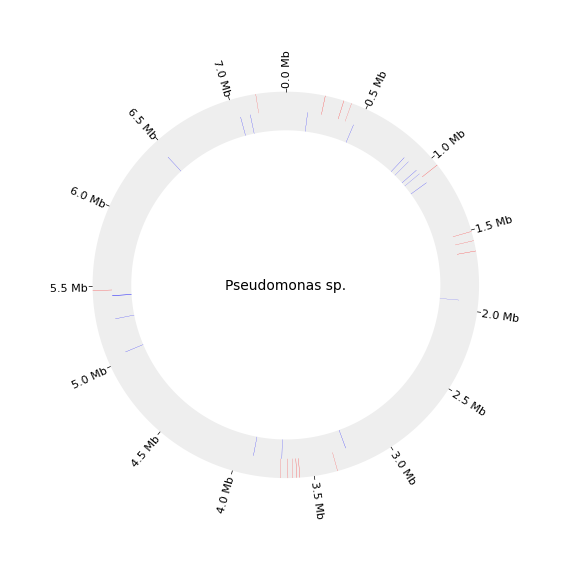

In [42]:
circos = Circos(sectors={accession: genome_length})
circos.text("Pseudomonas sp.")
circos_gff = Gff(gff_file="candidates.gff")
sector = circos.get_sector(accession)
sector = circos.sectors[0]
cds_track = sector.add_track((80, 100))
cds_track.axis(fc="#EEEEEE", ec="none")
cds_track.genomic_features(circos_gff.extract_features("CDS", target_strand =  1), r_lim=(90, 100),fc="red" )
cds_track.genomic_features(circos_gff.extract_features("CDS", target_strand = -1), r_lim=(80,  90),fc="blue")
pos_list, labels = [], []
cds_track.xticks_by_interval(
    interval=500000,
    label_formatter=lambda label_value: f"{label_value/ 1000000:.1f} Mb",
    label_orientation="vertical")
fig = circos.plotfig().set_figwidth(5)